In [8]:
import numpy as np
import random
from scipy.special import erfc
import matplotlib.pyplot as plt

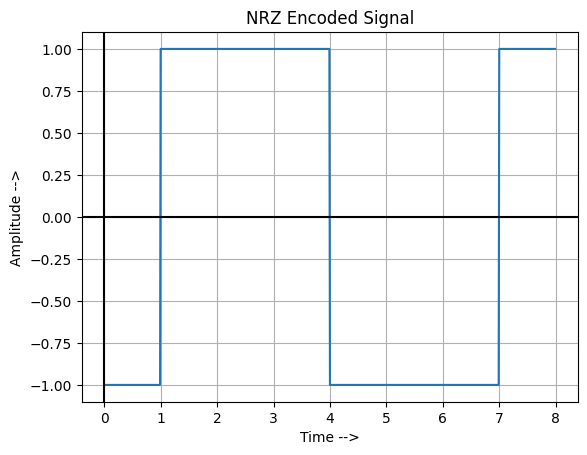

In [9]:
pi = np.pi

# NRZ encoding of binary Signal

m_len = 8
m = [random.choice([1,0]) for i in range(m_len)]
f = 100
NRZ = []
for i in m:
    if i == 1:
        for j in range(f):
            NRZ.append(1)
    else:
        for j in range(f):
            NRZ.append(-1)
NRZ = np.array(NRZ)

t = np.arange(0, m_len, 1 / f)
plt.plot(t,NRZ)
plt.title('NRZ Encoded Signal')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline(0, color = 'black')
plt.axvline(0, color ='black')
plt.grid(True)

In [10]:
# Carrier Wave
amp = 1
fc = 2
car = np.sin(2 * pi * t * fc)


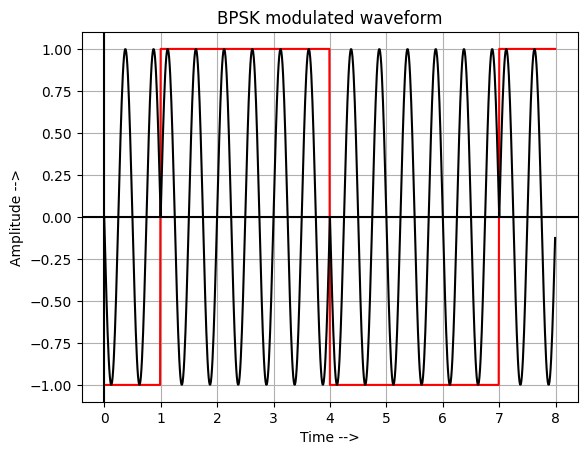

In [11]:
#BPSK Modulated
BPSK = NRZ * car
plt.plot(t, NRZ, color = 'red')
plt.plot(t, BPSK, color = 'black')
plt.title('BPSK modulated waveform')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.grid(True)

In [12]:
Receiver = BPSK * car
recon = []
for i in range(len(Receiver)):
    if Receiver[i] > 0:
        recon.append(1)
    elif Receiver[i] < 0:
        recon.append(0)
    else:
        if Receiver[i] > Receiver[i -1]:
            recon.append(1)
        else:
            recon.append(0)

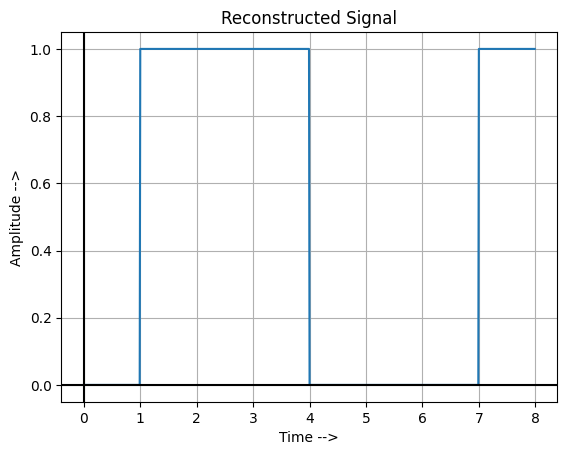

In [13]:
plt.plot(t,recon)
plt.title('Reconstructed Signal')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.grid(True)

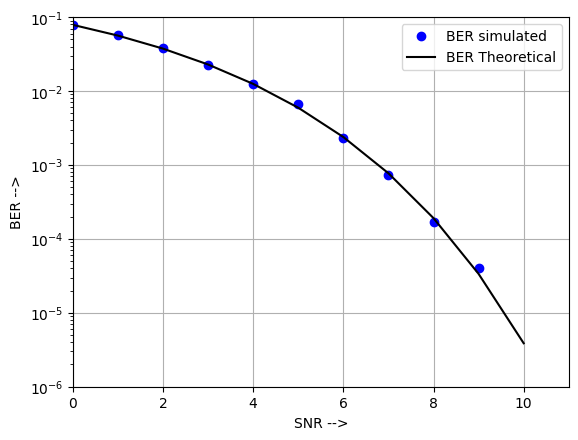

In [14]:
#BER vs SNR
SNR_db = np.arange(0,11)
N_sym = 10 ** 5
BER_sim = np.zeros(len(SNR_db))
sym = [random.choice([0,1]) for i in range(N_sym)]
NRZ1 = [1 if i == 1 else -1 for i in sym]
NRZ1 = np.array(NRZ1)

for i, SNR in enumerate(SNR_db):
    gamma = 10 ** (SNR / 10)
    P = sum(abs(NRZ1) ** 2) / len(NRZ1)
    N = P / gamma
    n = np.sqrt(N / 2) * np.random.standard_normal(NRZ1.shape)
    r = NRZ1 + n

    sym_det = np.zeros(len(r))
    for j in range(len(r)):
        if r[j] > 0:
            sym_det[j] = 1
        else:
            sym_det[j] = 0
    BER_sim[i]= np.sum(sym_det != sym) / N_sym

BER_theo = 0.5 * erfc(np.sqrt ( 10 ** (SNR_db / 10)))

plt.plot(SNR_db, BER_sim, 'bo', label = 'BER simulated')
plt.plot(SNR_db, BER_theo, 'k', label = 'BER Theoretical')
plt.axis([0, 11, 1e-6, 0.1])
plt.legend()
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('SNR -->')
plt.ylabel('BER -->')
plt.grid(True)
plt.show()

Binary Phase Shift Keying (BPSK). Basically, we took our message and converted it into
phase shifts of a carrier signal, which is like the backbone of our transmission. Then, we
added some noise to mimic what happens in real-world situations. At the receiving end,
we used a clever method called coherent detection to make sense of the noisy signal..
We tested how well our system performed by looking at something called the Bit Error
Rate (BER), which tells us how many mistakes our system makes in transmitting bits of
data. As we expected, when we increased the signal strength compared to the noise
(SNR), our system made fewer errors.
Overall, this experiment showed us that BPSK and coherent detection are pretty good
at handling noise in communication systems.

The simulation of Binary Phase Shift Keying (BPSK) modulation and demodulation went
smoothly, and we managed to accurately recover the binary data using coherent
detection. We analyzed the Bit Error Rate (BER) across a range of Signal-to-Noise
Ratios (SNRs) from -4dB to 10dB.
As anticipated, we observed a decrease in BER as the SNR increased, which makes
sense because stronger signals relative to noise result in fewer errors. Importantly, our
simulated BER closely matched the theoretical BER, indicating that our simulation was
on point and that BPSK modulation is resilient even in noisy conditions.
This experiment underscores the reliability of BPSK modulation, particularly in
environments where noise is a factor